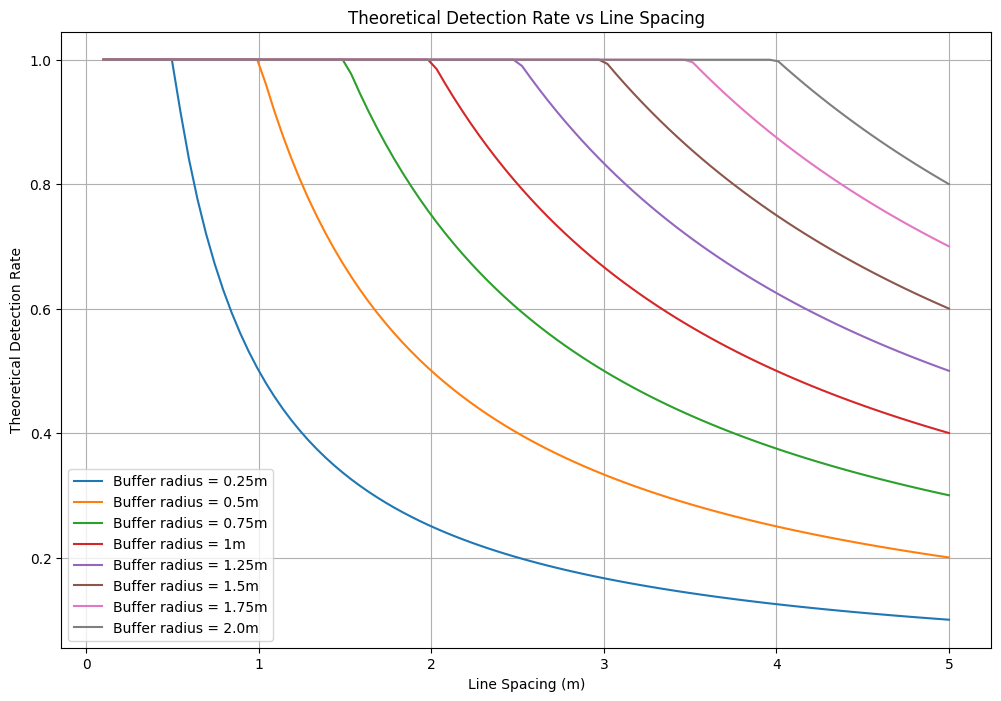


Analyzing buffer radius = 2m
Optimal spacing for 95% detection rate: 4.21m


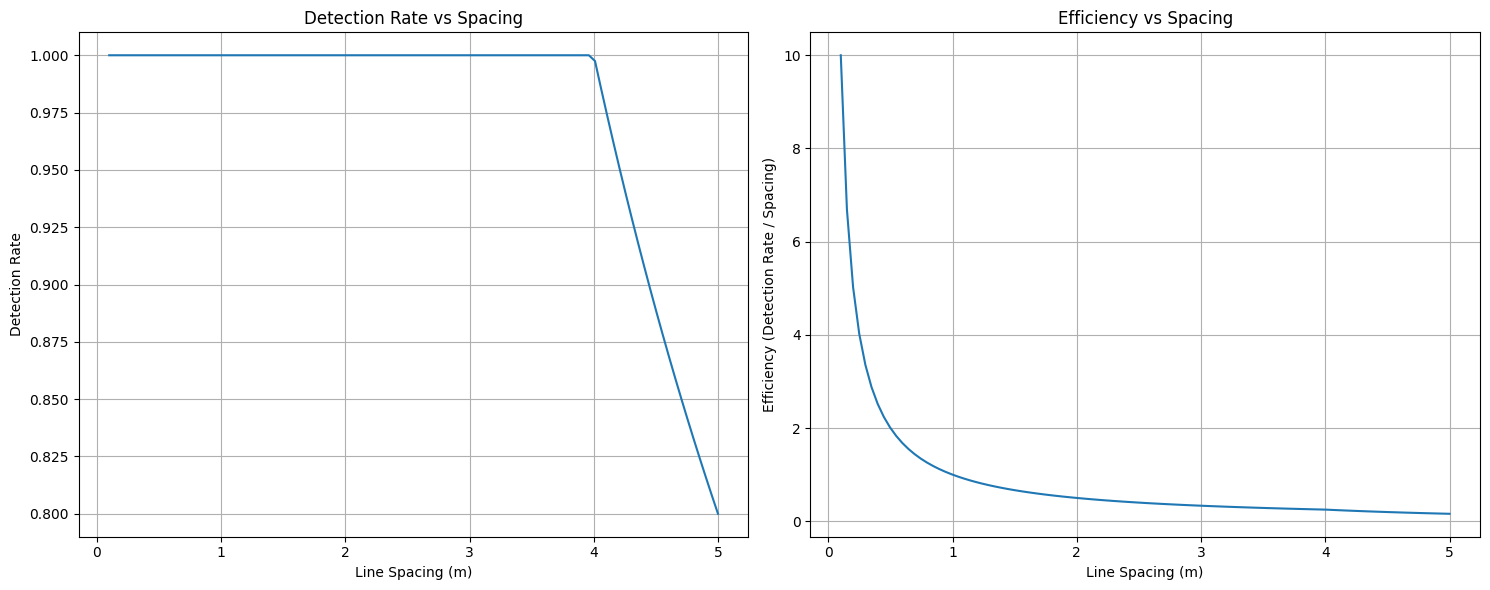


Analysis for buffer radius = 2m:
Most efficient spacing: 0.10m
Detection rate at max efficiency: 100.00%
Efficiency score: 10.000


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

class TheoreticalModel:
    def __init__(self, plot_width: float = 10.0, plot_height: float = 10.0):
        """
        Initialize theoretical model for parallel search analysis.
        
        Args:
            plot_width: Width of the plot in meters
            plot_height: Height of the plot in meters
        """
        self.width = plot_width
        self.height = plot_height
        
    def theoretical_detection_rate(self, buffer_radius: float, spacing: float) -> float:
        """
        Calculate theoretical detection rate for parallel search.
        
        For randomly distributed plants, the detection rate can be modeled as the
        ratio of the area covered by the detection buffers along the search lines
        to the total plot area.
        
        Args:
            buffer_radius: Detection radius around each plant
            spacing: Distance between parallel search lines
            
        Returns:
            float: Theoretical detection rate (0-1)
        """
        if spacing <= 0:
            return 0
            
        # If spacing is less than 2 * buffer_radius, buffers overlap
        effective_width = min(2 * buffer_radius, spacing)
        
        # Calculate coverage area
        coverage = (self.width * self.height * effective_width) / spacing
        
        # Return ratio of covered area to total area
        return min(coverage / (self.width * self.height), 1.0)
    
    def plot_theoretical_curves(self, 
                              buffer_radii: list = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2.0],
                              spacing_range: tuple = (0.1, 5.0),
                              num_points: int = 100):
        """
        Plot theoretical detection rate curves for different buffer radii.
        """
        spacings = np.linspace(spacing_range[0], spacing_range[1], num_points)
        
        plt.figure(figsize=(12, 8))
        
        for radius in buffer_radii:
            rates = [self.theoretical_detection_rate(radius, s) for s in spacings]
            plt.plot(spacings, rates, label=f'Buffer radius = {radius}m')
        
        plt.xlabel('Line Spacing (m)')
        plt.ylabel('Theoretical Detection Rate')
        plt.title('Theoretical Detection Rate vs Line Spacing')
        plt.grid(True)
        plt.legend()
        plt.show()
    
    def find_optimal_spacing(self, 
                           buffer_radius: float,
                           min_detection_rate: float = 0.95,
                           spacing_range: tuple = (0.1, 5.0)) -> float:
        """
        Find optimal spacing that achieves desired detection rate.
        
        Args:
            buffer_radius: Detection radius around each plant
            min_detection_rate: Minimum acceptable detection rate (0-1)
            spacing_range: Range of spacing values to consider
            
        Returns:
            float: Optimal spacing
        """
        from scipy.optimize import fsolve
        
        def objective(spacing):
            return self.theoretical_detection_rate(buffer_radius, spacing) - min_detection_rate
        
        # Find spacing where detection rate equals min_detection_rate
        optimal_spacing = fsolve(objective, x0=2*buffer_radius)[0]
        
        if spacing_range[0] <= optimal_spacing <= spacing_range[1]:
            return optimal_spacing
        else:
            return None
    
    def analyze_spacing_efficiency(self, 
                                 buffer_radius: float,
                                 spacing_range: tuple = (0.1, 5.0),
                                 num_points: int = 100):
        """
        Analyze efficiency trade-off between spacing and detection rate.
        """
        spacings = np.linspace(spacing_range[0], spacing_range[1], num_points)
        rates = [self.theoretical_detection_rate(buffer_radius, s) for s in spacings]
        
        # Calculate efficiency (detection rate per unit spacing)
        efficiency = [rate/spacing for rate, spacing in zip(rates, spacings)]
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Plot detection rate
        ax1.plot(spacings, rates)
        ax1.set_xlabel('Line Spacing (m)')
        ax1.set_ylabel('Detection Rate')
        ax1.set_title('Detection Rate vs Spacing')
        ax1.grid(True)
        
        # Plot efficiency
        ax2.plot(spacings, efficiency)
        ax2.set_xlabel('Line Spacing (m)')
        ax2.set_ylabel('Efficiency (Detection Rate / Spacing)')
        ax2.set_title('Efficiency vs Spacing')
        ax2.grid(True)
        
        plt.tight_layout()
        plt.show()
        
        # Print analysis
        max_efficiency_idx = np.argmax(efficiency)
        max_efficiency_spacing = spacings[max_efficiency_idx]
        print(f"\nAnalysis for buffer radius = {buffer_radius}m:")
        print(f"Most efficient spacing: {max_efficiency_spacing:.2f}m")
        print(f"Detection rate at max efficiency: {rates[max_efficiency_idx]:.2%}")
        print(f"Efficiency score: {efficiency[max_efficiency_idx]:.3f}")

# Example usage
if __name__ == "__main__":
    model = TheoreticalModel()
    
    # Plot theoretical curves for different buffer radii
    model.plot_theoretical_curves()
    
    # Analyze specific buffer radius
    buffer_radius = 2
    print(f"\nAnalyzing buffer radius = {buffer_radius}m")
    
    # Find optimal spacing for 95% detection rate
    optimal_spacing = model.find_optimal_spacing(buffer_radius)
    if optimal_spacing:
        print(f"Optimal spacing for 95% detection rate: {optimal_spacing:.2f}m")
    
    # Analyze efficiency trade-off
    model.analyze_spacing_efficiency(buffer_radius)